In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

http://www.mathematica-journal.com/2010/09/an-introduction-to-correspondence-analysis/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3718710/

First, we have the cross tabulation (contigency) table of countries of residence and the primary language spoken by the respondents in this hypothetical study.

There were 1000 respondents per country in this study.

The cross tabulation matrix is the $I \times J$ matrix $F = \left[ f_{ij} \right]$.

In [2]:
F = pd.read_csv('country_language_contingency.csv', index_col=0)

print("cross-tabulation matrix F:\n\n{}".format(F))

cross-tabulation matrix F:

             English  French  Spanish  German  Italian
Canada           688     280       10      11       11
USA              730      31      190       8       41
England          798      74       38      31       59
Italy             17      13       11      15      944
Switzerland       15     222       20     648       95


Next we derive the _correspondence matrix_ $P$ from $F$ with

\begin{align}
  P &= \left[ p_{ij} \right] \\
    &= \left[ \frac{f_{ij}}{n} \right] & \text{where } n = \sum_{i=1}^{I} \sum_{j=1}^{J} f_{ij}
\end{align}

In [3]:
P = F / F.sum().sum()

print("correspondence matrix P:\n\n{}".format(P))

correspondence matrix P:

             English  French  Spanish  German  Italian
Canada        0.1376  0.0560   0.0020  0.0022   0.0022
USA           0.1460  0.0062   0.0380  0.0016   0.0082
England       0.1596  0.0148   0.0076  0.0062   0.0118
Italy         0.0034  0.0026   0.0022  0.0030   0.1888
Switzerland   0.0030  0.0444   0.0040  0.1296   0.0190


----

Next we define the _row_ and _column totals_.

The _row totals_, which can be interpreted as the marginal frequency distribution over the sum of the rows (countries), reflect the fact that there were equally 1000 respondents per country in this study.

Row totals are derived with

\begin{align}
  p_{i+} &= \sum_{j=1}^{J} p_{ij}
\end{align}

In [4]:
row_totals = P.sum(axis=1)

print("row totals (marginal frequency distribution over the countries):\n\n{}".format(row_totals))

row totals (marginal frequency distribution over the countries):

Canada         0.2
USA            0.2
England        0.2
Italy          0.2
Switzerland    0.2
dtype: float64


On the other hand, the _column totals_ can be interpreted as the marginal frequency distribution over the sum of the columns (languages).

\begin{align}
  p_{+j} &= \sum_{i=1}^{I} p_{ij}
\end{align}

In [5]:
col_totals = P.sum(axis=0)

print("column totals (marginal frequency distribution over the languages):\n\n{}".format(col_totals))

column totals (marginal frequency distribution over the languages):

English    0.4496
French     0.1240
Spanish    0.0538
German     0.1426
Italian    0.2300
dtype: float64


The $\chi^2$ distances between rows gives us a clue as to how the countries relate to one another in terms of the primary spoken languages.

The $\chi^2$ distance between rows $i$ and $k$ is given by

\begin{align}
 d_{ik} &= \sqrt{\sum_{j=1}^{J} \frac{(p_{ij}/p_{i+} - p_{kj}/p_{k+})^2}{p_{+j}} }
\end{align}

In [6]:
data = []
for _,row in P.iterrows():
    acc = []
    cntry_i = row.name
    p_iplus = row_totals.ix[cntry_i]
    for  cntry_k in P.index:
        p_kplus = row_totals.ix[cntry_k]
        chisqd = np.sqrt(np.sum(np.square(row/p_iplus - P.ix[cntry_k]/p_kplus) / col_totals))
        acc.append(chisqd)
    data.append(acc)

row2row_chisqd = pd.DataFrame(data, index=P.index, columns=P.index)

print("row-to-row Chi-squared distance table:\n\n{}".format(row2row_chisqd))

row-to-row Chi-squared distance table:

               Canada       USA   England     Italy  Switzerland
Canada       0.000000  1.053631  0.629709  2.315427     1.978023
USA          1.053631  0.000000  0.678054  2.296625     2.203064
England      0.629709  0.678054  0.000000  2.192568     2.054644
Italy        2.315427  2.296625  2.192568  0.000000     2.509498
Switzerland  1.978023  2.203064  2.054644  2.509498     0.000000


We can see in this row-to-row $\chi^2$ distance table that for the Anglophonic countries, Canada, USA and England should be clustered near one another, while Italy and Switzerland are both separated from the other countries.

Conversely, the $\chi^2$ distances between columns gives us a clue as to how the languages relate to one another in terms of the countries.

The $\chi^2$ distance between columns $j$ and $k$ is given by

\begin{align}
 d_{jk} &= \sqrt{\sum_{i=1}^{I} \frac{(p_{ij}/p_{+j} - p_{kj}/p_{+k})^2}{p_{i+}} }
\end{align}

In [7]:
PT = P.T

data = []
for _,row in PT.iterrows():
    acc = []
    lang_j = row.name
    p_plusj = col_totals.ix[lang_j]
    for lang_k in PT.index:
        p_plusk = col_totals.ix[lang_k]
        chisqd = np.sqrt(np.sum(np.square(row/p_plusj - PT.ix[lang_k]/p_plusk) / row_totals))
        acc.append(chisqd)
    data.append(acc)

col2col_chisqd = pd.DataFrame(data, index=PT.index, columns=PT.index)

print("column-to-column Chi-squared distance table:\n\n{}".format(col2col_chisqd))

column-to-column Chi-squared distance table:

          English    French   Spanish    German   Italian
English  0.000000  1.174400  1.160320  2.338660  2.157459
French   1.174400  0.000000  1.849170  1.582510  2.140049
Spanish  1.160320  1.849170  0.000000  2.439221  2.309852
German   2.338660  1.582510  2.439221  0.000000  2.572037
Italian  2.157459  2.140049  2.309852  2.572037  0.000000


For the languages, we can see from the column-to-column $\chi^2$ distances that English and Spanish should be closely related, with French somewhere between English and German. Italian, however, should be sitting alone all by itself away from the others.

----

We start with a matrix of _standardized residuals_:

\begin{align}
  \Omega &= \left[ \frac{p_{ij} - \mu_{ij}}{\sqrt{\mu_{ij}}}  \right]
\end{align}

In [8]:
row_totals = row_totals.as_matrix().reshape((5,1))
col_totals = col_totals.as_matrix().reshape((1,5))

Mu_ij = row_totals * col_totals
Mu_ij

array([[ 0.08992,  0.0248 ,  0.01076,  0.02852,  0.046  ],
       [ 0.08992,  0.0248 ,  0.01076,  0.02852,  0.046  ],
       [ 0.08992,  0.0248 ,  0.01076,  0.02852,  0.046  ],
       [ 0.08992,  0.0248 ,  0.01076,  0.02852,  0.046  ],
       [ 0.08992,  0.0248 ,  0.01076,  0.02852,  0.046  ]])

In [9]:
Omega = (P.as_matrix() - Mu_ij) / np.sqrt(Mu_ij)
Omega

array([[ 0.15900402,  0.1981202 , -0.08444967, -0.15585155, -0.20421855],
       [ 0.18701647, -0.11811012,  0.26260378, -0.1594044 , -0.17624341],
       [ 0.23236997, -0.06350006, -0.03046358, -0.1321659 , -0.15945832],
       [-0.28852826, -0.14097014, -0.0825216 , -0.15111442,  0.66580843],
       [-0.28986219,  0.12446012, -0.06516893,  0.59853627, -0.12588815]])

In [10]:
U,S,V = np.linalg.svd(Omega)

In [11]:
num_sv = np.arange(1,6)

cum_var_explained = [np.sum(np.square(S[0:n])) / np.sum(np.square(S)) for n in num_sv]

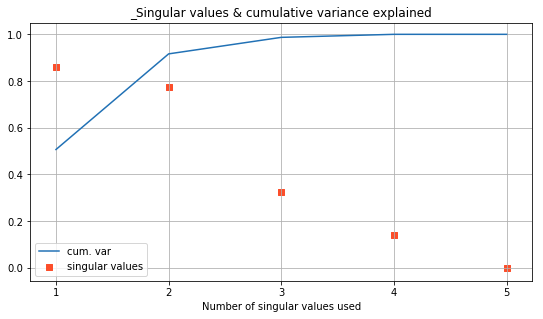

In [12]:
fig = plt.figure(figsize=(9,4.75))
ax = fig.add_subplot(111)

plt.plot(num_sv, cum_var_explained, color='#2171b5', label='cum. var')
plt.scatter(num_sv, S, marker='s', color='#fc4e2a', label='singular values')

ax.set_xticks(num_sv)

plt.title('_Singular values & cumulative variance explained')
plt.xlabel('Number of singular values used')
plt.legend(loc='lower left')

plt.grid()

In [13]:
cntry_x = U[:,0]
cntry_y = U[:,1]

lang_x = V.T[:,0]
lang_y = V.T[:,1]

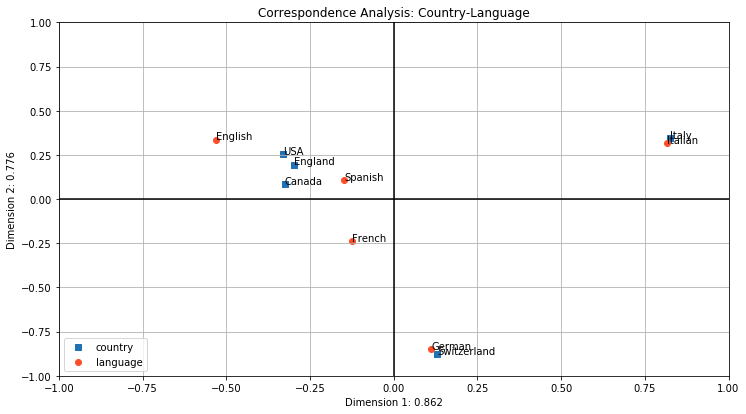

In [14]:
fig = plt.figure(figsize=(12,6.5))
ax = fig.add_subplot(111)

plt.scatter(cntry_x, cntry_y, marker='s', color='#2171b5', label='country')
for i,xy in enumerate(zip(cntry_x, cntry_y)):
    ax.annotate("{}".format(P.index[i]), xy=xy, textcoords='data')

plt.scatter(lang_x, lang_y, marker='o', color='#fc4e2a', label='language')
for i,xy in enumerate(zip(lang_x, lang_y)):
    ax.annotate("{}".format(P.columns[i]), xy=xy, textcoords='data')

plt.title('Correspondence Analysis: Country-Language')
plt.xlabel('Dimension 1: {:0.3f}'.format(S[0]))
plt.ylabel('Dimension 2: {:0.3f}'.format(S[1]))
plt.legend(loc='lower left', scatterpoints=1)

ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')

ax.set_xlim([-1.0, 1.0])
ax.set_ylim([-1.0, 1.0])

plt.grid()